In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('../data/train.csv', sep=';')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
1,2,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
2,3,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
3,4,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
4,5,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
5,6,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
6,7,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
7,8,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
8,9,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
9,10,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [92]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,802.000000,802.000000,802.000000,646.000000,802.000000,802.000000,802.000000
mean,401.500000,0.377805,2.296758,30.075604,0.493766,0.374065,32.431675
std,231.661751,0.485141,0.838651,14.470148,1.084719,0.781960,50.414965
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,201.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,401.500000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,601.750000,1.000000,3.000000,39.000000,1.000000,0.000000,30.923950
max,802.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            156
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          615
Embarked         1
dtype: int64

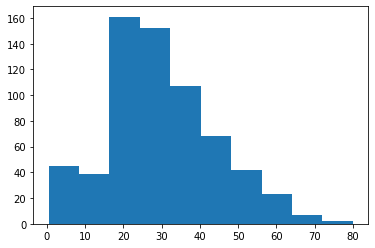

In [94]:
plt.hist(df.Age);

In [95]:
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.')

In [96]:
title_counts = df['Title'].value_counts() 
title_counts

Mr          474
Miss        160
Mrs         109
Master       33
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Countess      1
Ms            1
Mme           1
Lady          1
Jonkheer      1
Capt          1
Name: Title, dtype: int64

In [97]:
df['Age'] = df.groupby('Title').transform(lambda x: x.fillna(x.mean()))

In [98]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          615
Embarked         1
Title            0
dtype: int64

In [99]:
popular_titles = title_counts[title_counts > 10].index.to_list()
popular_titles

['Mr', 'Miss', 'Mrs', 'Master']

In [100]:
df.loc[~df.Title.isin(popular_titles), 'Title'] = 'Other'
df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1)

In [101]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Master,Miss,Mr,Mrs,Other
0,1,0,3,"Celotti, Mr. Francesco",male,1.0,0,0,343275,8.0500,NaN,S,Mr,0,0,1,0,0
1,2,0,3,"Christmann, Mr. Emil",male,2.0,0,0,343276,8.0500,NaN,S,Mr,0,0,1,0,0
2,3,0,3,"Andreasson, Mr. Paul Edvin",male,3.0,0,0,347466,7.8542,NaN,S,Mr,0,0,1,0,0
3,4,0,1,"Chaffee, Mr. Herbert Fuller",male,4.0,1,0,W.E.P. 5734,61.1750,E31,S,Mr,0,0,1,0,0
4,5,0,3,"Dean, Mr. Bertram Frank",male,5.0,1,2,C.A. 2315,20.5750,NaN,S,Mr,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,798,0,2,"Montvila, Rev. Juozas",male,798.0,0,0,211536,13.0000,NaN,S,Other,0,0,0,0,1
798,799,1,1,"Graham, Miss. Margaret Edith",female,799.0,0,0,112053,30.0000,B42,S,Miss,0,1,0,0,0
799,800,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,800.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,0,1,0,0,0
800,801,1,1,"Behr, Mr. Karl Howell",male,801.0,0,0,111369,30.0000,C148,C,Mr,0,0,1,0,0


In [105]:
df.Cabin.str.extract(r'([A-Z])').value_counts()

C    52
B    44
E    31
D    31
A    14
F    11
G     3
T     1
dtype: int64

In [ ]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])